The following runs the Classification Experiment. Remove "--Test" to run on full dataset for many epochs.

Using GPU 7
Found 88 CPUs and 10 GPUs. Using 8 threads. max_threads = 12
HyperParameter Scan:  240 possible combiniations.
______________________________________
ScanConfiguration
______________________________________
Picked combination:  0
Combo[0]={'Width': 32, 'Depth': 1, 'lr': 0.01, 'optimizer': "'RMSprop'", 'decay': 0.01}
Model Filename:  CaloDNN_32_1_0.01_RMSprop_0.01
______________________________________
Couldn't import dot_parser, loading of dot files will not be possible.


Using Theano backend.
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 7: TITAN X (Pascal) (CNMeM is disabled, cuDNN 5105)


Searching in : /data/LCD/V2/MLDataset/*/*.h5
Found 40 files.
Train Class Index Map: {'Pi0': 0, 'Gamma': 1}
Caching data on disk for faster processing after first epoch. Hope you have enough disk space.
Looking for Previous Model to load.
Building Model... Merged Models
 Done.
Output Directory: /home/mazhang/DLKit/CaloDNN/NeuralNets/Cache/Dense_GammaPi0_50Epochs/Model/CaloDNN_32_1_0.01_RMSprop_0.01_Merged
____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 25, 25, 25)    0                                            
____________________________________________________________________________________________________
input_2 (InputLayer)             (None, 5, 5, 60)      0                                            
_______________________________________________________________________________________

234/234 [==============================] - 43s - loss: 0.3672 - acc: 0.8543 - val_loss: 0.3401 - val_acc: 0.8677
Epoch 24/50
234/234 [==============================] - 43s - loss: 0.3598 - acc: 0.8545 - val_loss: 0.3411 - val_acc: 0.8675
Epoch 25/50
234/234 [==============================] - 41s - loss: 0.3594 - acc: 0.8552 - val_loss: 0.3390 - val_acc: 0.8689
Epoch 26/50
234/234 [==============================] - 26s - loss: 0.3567 - acc: 0.8559 - val_loss: 0.3397 - val_acc: 0.8682
Epoch 27/50
234/234 [==============================] - 42s - loss: 0.3575 - acc: 0.8560 - val_loss: 0.3385 - val_acc: 0.8688
Epoch 28/50
234/234 [==============================] - 43s - loss: 0.3570 - acc: 0.8565 - val_loss: 0.3398 - val_acc: 0.8625
Epoch 29/50
234/234 [==============================] - 43s - loss: 0.3561 - acc: 0.8563 - val_loss: 0.3399 - val_acc: 0.8687
Epoch 30/50
234/234 [==============================] - 47s - loss: 0.3572 - acc: 0.8561 - val_loss: 0.3379 - val_acc: 0.8693
Epoch 31/50


/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


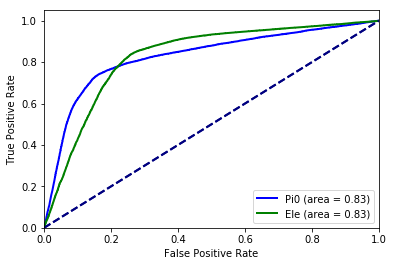

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%run -im CaloDNN.NeuralNets.ClassificationExperiment -- -C "CaloDNN/NeuralNets/ScanConfigs/Dense_GammaPi0.py"

In [ ]:
sys.path.append('/home/jupyterhubadmin/.virtualenvs/meow/local/lib/python2.7/site-packages/')
from DLAnalysis.Scan import *

MyModels=[MyModel]
# Rename the Models using Width and Depth
ResetNames(MyModels,["Width","Depth"])

# Add the number of epochs to MetaData by counting length of history
GetEpochs(MyModels)

# Pull data from previous trainings into latest MetaData, with "All_" suffix
print "Historical Parameters:",GetHistorical(MyModels) 
print "-------------"
print "MetaData:",MyModel.MetaData.keys()
print "-------------"

print "Available Parameters:", GetGoodParams(MyModels)

In [ ]:
ScanTable(MyModels,['Model Name', 'Width', 'Depth', 'Epochs', 'Ele_AUC',  'Pi0_AUC', 'ChPi_AUC',  'Gamma_AUC'],[1,2,0])

In [ ]:
PlotMetaDataMany(MyModels,4,
                [["History","loss"],["History","val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

In [ ]:
# Note this will work only if you trained the same model more than once 
PlotMetaData(MyModels,["All_History.loss"])

In [ ]:
PlotMetaDataMany(MyModels,4,
                [["All_History.loss"],["All_History.val_loss"]],
                     sort=["Width","Depth","lr","decay"],switch=["Width","Depth"],loc="center left")

In [ ]:
MyModel.MetaData["InputMetaData"]

In [ ]:
GetHistorical(MyModels)